In [1]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('transaction.csv', encoding = "ISO-8859-1")
# Convert InvoiceDate from object to datetime format
df['createdAt'] = pd.to_datetime(df['createdAt'])

In [3]:
#get the snpshot of date 
snapshot_date = df['createdAt'].max() + timedelta(days=1)
print(snapshot_date)

2021-04-27 14:26:05


In [4]:
data_process = df.groupby(['payerIdTransformed'], as_index=False).agg({
        'createdAt': lambda x: (snapshot_date - x.max()).days,
        'payerAccountNumber': 'count',
        'originalAmount':'sum',
        'bank_approved':'sum',
        'bank_err':'sum',
        'bank_invalid_card':'sum',
        'bank_insufficient_fund':'sum',
        'bank_do_not_honor':'sum',
        'bank_lost_card':'sum',
        'amount_high':'sum',
        'is_fraud':'sum',
        'channel_master':'sum',
        'channel_visa':'sum',
        'channel_amex':'sum'
    
})

In [5]:
data_process.rename(columns={'createdAt': 'recency',
                         'payerAccountNumber': 'frequency',
                         'originalAmount': 'total_value',
                           'bank_approved': 'tot_bank_approves',
                            'bank_err': 'tot_bank_err',
                            'bank_invalid_card':'tot_invalid_card',
                            'bank_insufficient_fund':'tot_insufficient_fund',
                            'bank_do_not_honor':'tot_bank_do_not_honor',
                            'bank_lost_card':'tot_bank_lost_card',
                            'amount_high':'tot_amount_high',
                            'is_fraud':'tot_fraud_count',
                            'channel_master':'tot_channel_master',
                            'channel_visa':'tot_channel_visa',
                            'channel_amex':'tot_channel_amex'}, inplace=True)

In [6]:
data_process.head()

,payerIdTransformed,recency,frequency,total_value,tot_bank_approves,tot_bank_err,tot_invalid_card,tot_insufficient_fund,tot_bank_do_not_honor,tot_bank_lost_card,tot_amount_high,tot_fraud_count,tot_channel_master,tot_channel_visa,tot_channel_amex
0,170,124,40,214153.0,18,0,4,2,16,0,4,36,40,0,0
1,171,235,9,591.0,4,0,0,0,5,0,0,9,9,0,0
2,172,258,12,1316.0,1,0,0,0,11,0,0,12,12,0,0
3,173,255,9,180.0,7,0,0,0,2,0,0,9,9,0,0
4,174,126,11,221198.0,0,0,3,1,7,0,4,8,11,0,0


In [7]:
print('{:,} rows; {:,} columns'
      .format(data_process.shape[0], data_process.shape[1]))

29,162 rows; 15 columns


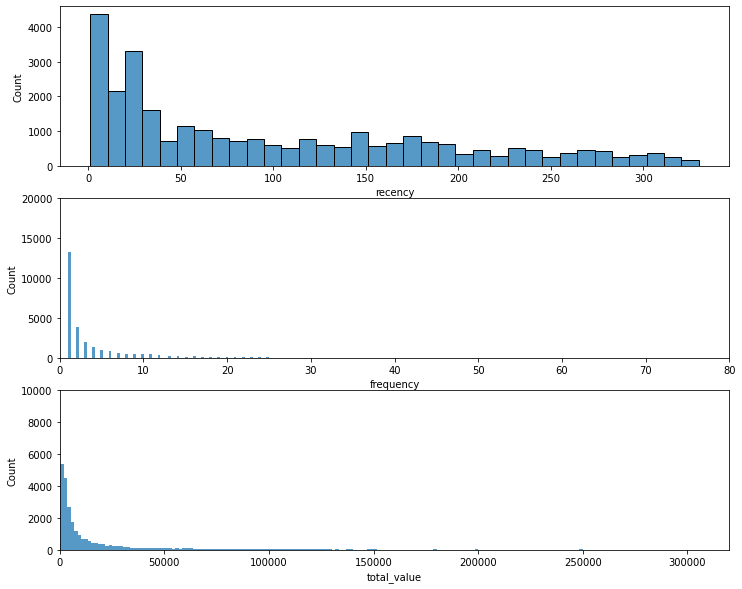

In [8]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(data_process['recency'])

# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(data_process['frequency'])
plt.ylim(0, 20000)
plt.xlim(0, 80)

# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(data_process['total_value'])
plt.ylim(0, 10000)
plt.xlim(0, 320000)


plt.show()

In [11]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 

r_groups = pd.qcut(data_process['recency'], q=4, labels=r_labels)
f_groups = pd.qcut(data_process['frequency'], q=4,labels=f_labels, duplicates='drop')


# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['total_value'], q=4, labels=m_labels)


# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
data_process['RFM_score'] = data_process[['R','F','M']].sum(axis=1)

print(data_process['RFM_score'].unique())

[10  6  7  9  3  8  5 12 11  4]


In [12]:
data_process.to_csv('rfm_features.csv',index=False)